### Task 4a

**Modify the exercise 2 for this new dataset in link 4a. Compare the results and dataset 
from 4a to modified exercise 2 predictor results.  Is the linear regressor better than the 
LSTM predictor? Return your analysis with images and zipped code.**

Import libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Load dataset

In [42]:
# Load the dataset
housing = fetch_california_housing()

# Create a DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Explore the Dataset

In [43]:
# Check for missing values
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [44]:
# Summary statistics
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

Split the Dataset into Training and Test Sets

In [45]:
# Define features and target variable
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
print('Shape of training set:', X_train.shape)
print('Shape of test set:', X_test.shape)


Shape of training set: (14448, 8)
Shape of test set: (6192, 8)


Create and Fit the Model

In [46]:
# Create the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Display the coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -37.55216631658927
Coefficients: [ 4.41181942e-01  9.70730794e-03 -1.19993946e-01  7.84709051e-01
 -3.39466724e-07 -3.28239095e-03 -4.23679731e-01 -4.39311822e-01]


Make Predictions

In [47]:
# Make predictions
y_pred = model.predict(X_test)

Visualize the Predictions

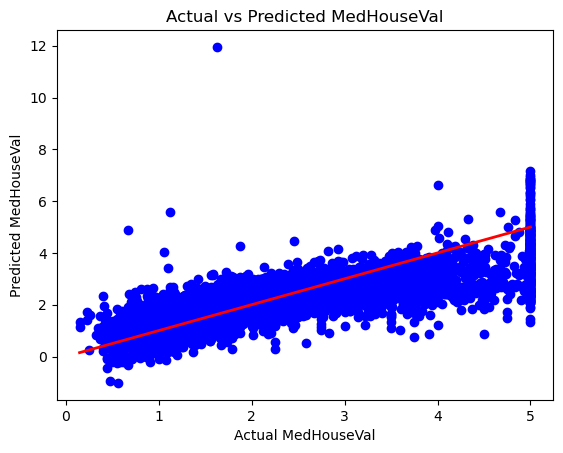

In [48]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.title('Actual vs Predicted MedHouseVal')
plt.show()

Save variables for latter plot.

In [49]:
y_test_linear = y_test
y_pred_linear = y_pred

Evaluate the Model

In [50]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.5385446422423641
R-squared: 0.5966234519623752


**Analysis:**

Model works ok, based on MSE error of 0.53. Thus, there are room for improvement with value range 0-5. The Actual vs Predicted MedHouseVal image gives more insight as it seems to that model work better for small values 0-3 and variance increases radically for 4-5.

### Task 4b

Implement LSTM on the dataset. We want to predict MedHousingVal using different features.

Lets look again the data

In [51]:
print(len(df))
df.head()

20640


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [52]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Select columns

- HouseAge      median house age in block group
- AveRooms      average number of rooms per household
- Latitude      block group latitude
- Longitude     block group longitude

In [53]:
# select column HouseAge, AveRooms

X = df[['HouseAge', 'AveRooms', 'Latitude', 'Longitude']]
y = df['MedHouseVal'].values


Normalize sets

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

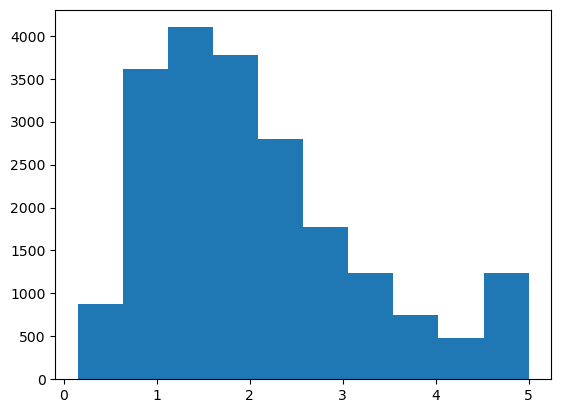

In [55]:
# plot y
plt.hist(y)
plt.show()

In [56]:
y[:50]

array([4.526, 3.585, 3.521, 3.413, 3.422, 2.697, 2.992, 2.414, 2.267,
       2.611, 2.815, 2.418, 2.135, 1.913, 1.592, 1.4  , 1.525, 1.555,
       1.587, 1.629, 1.475, 1.598, 1.139, 0.997, 1.326, 1.075, 0.938,
       1.055, 1.089, 1.32 , 1.223, 1.152, 1.104, 1.049, 1.097, 0.972,
       1.045, 1.039, 1.914, 1.76 , 1.554, 1.5  , 1.188, 1.888, 1.844,
       1.823, 1.425, 1.375, 1.875, 1.125])

In [57]:
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader for batches
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


X_train_reshaped = X_train_tensor.view(-1, 4, 1)
X_test_reshaped = X_test_tensor.view(-1, 4, 1)
y_train_tensor = y_train_tensor.view(-1, 1) 
y_test_tensor = y_test_tensor.view(-1, 1)

print(X_train_reshaped.shape, y_train_tensor.shape)
print(X_test_reshaped.shape, y_test_tensor.shape)

torch.Size([16512, 4, 1]) torch.Size([16512, 1])
torch.Size([4128, 4, 1]) torch.Size([4128, 1])


Convert data into tensors

In [58]:
from torch.autograd import Variable

class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super().__init__()
        self.num_classes = num_classes # output size
        self.num_layers = num_layers # number of recurrent layers in the lstm
        self.input_size = input_size # input size
        self.hidden_size = hidden_size # neurons in each lstm layer
        # LSTM model
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True, dropout=0.2) # lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) # fully connected 
        self.fc_2 = nn.Linear(128, num_classes) # fully connected last layer
        self.relu = nn.ReLU()
        
    def forward(self,x):
        # hidden state
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) # hidden state
        # cell state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) # cell state
        # propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) # (input, hidden, and internal state)
        hn = hn.view(-1, self.hidden_size) # reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) # first dense
        out = self.relu(out) # relu
        out = self.fc_2(out) # final output
        return out

In [59]:
def training_loop(n_epochs, lstm, optimiser, loss_fn, X_train, y_train,
                  X_test, y_test):
    for epoch in range(n_epochs):
        X_train = X_train.to(device)
        y_train = y_train.to(device)
        X_test = X_test.to(device)
        y_test = y_test.to(device)
        lstm.train()
        outputs = lstm.forward(X_train) # forward pass
        optimiser.zero_grad() # calculate the gradient, manually setting to 0
        # obtain the loss function
        loss = loss_fn(outputs, y_train)
        loss.backward() # calculates the loss of the loss function
        optimiser.step() # improve from loss, i.e backprop
        # test loss
        lstm.eval()
        test_preds = lstm(X_test)
        test_loss = loss_fn(test_preds, y_test)
        if epoch % 100 == 0:
            print("Epoch: %d, train loss: %1.5f, test loss: %1.5f" % (epoch, 
                                                                      loss.item(), 
                                                                      test_loss.item())) 

In [60]:
import warnings
warnings.filterwarnings('ignore')

n_epochs = 1000 # 1000 epochs
learning_rate = 0.001 # 0.001 lr

input_size = 1
hidden_size = 16
num_layers = 1
num_classes = 1

lstm = LSTM(num_classes, 
              input_size, 
              hidden_size, 
              num_layers)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lstm.to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=0.001)

training_loop(n_epochs=n_epochs,
              lstm=lstm,
              optimiser=optimizer,
              loss_fn=loss_fn,
              X_train=X_train_reshaped,
              y_train=y_train_tensor,
              X_test=X_test_reshaped,
              y_test=y_test_tensor)

Epoch: 0, train loss: 4.74063, test loss: 4.59363
Epoch: 100, train loss: 1.31197, test loss: 1.28401
Epoch: 200, train loss: 1.25780, test loss: 1.23038
Epoch: 300, train loss: 0.82883, test loss: 0.79690
Epoch: 400, train loss: 0.64420, test loss: 0.63194
Epoch: 500, train loss: 0.57074, test loss: 0.56506
Epoch: 600, train loss: 0.53915, test loss: 0.53599
Epoch: 700, train loss: 0.52463, test loss: 0.52412
Epoch: 800, train loss: 0.51206, test loss: 0.51319
Epoch: 900, train loss: 0.50287, test loss: 0.50362


Train MSE: 0.4961, Train R2: 0.6289
Test MSE: 0.4969, Test R2: 0.6208


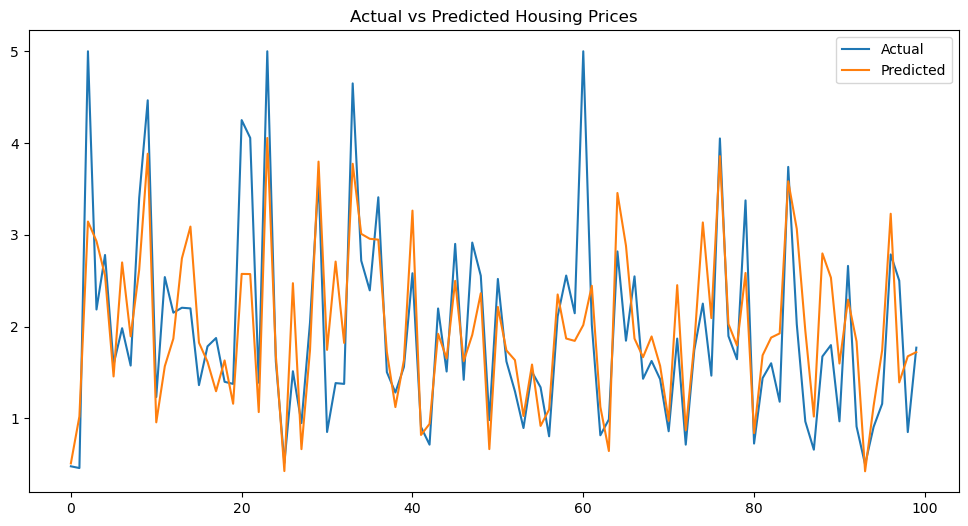

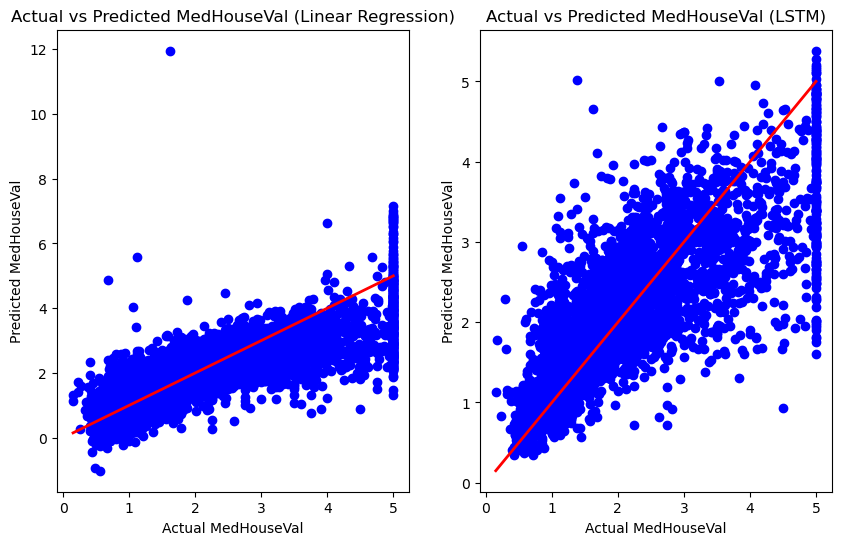

In [67]:
# Evaluate the model
lstm.eval()
with torch.no_grad():
    y_train_pred = lstm(X_train_reshaped.to(device)).cpu().numpy()
    y_test_pred = lstm(X_test_reshaped.to(device)).cpu().numpy()

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}, Train R2: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, Test R2: {test_r2:.4f}")

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test[:100], label="Actual")
plt.plot(y_test_pred[:100], label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Housing Prices")
plt.show()

# plot linear regression and lstm
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].scatter(y_test_linear, y_pred_linear, color='blue')
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
ax[0].set_xlabel('Actual MedHouseVal')
ax[0].set_ylabel('Predicted MedHouseVal')
ax[0].set_title('Actual vs Predicted MedHouseVal (Linear Regression)')

ax[1].scatter(y_test, y_test_pred, color='blue')
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
ax[1].set_xlabel('Actual MedHouseVal')
ax[1].set_ylabel('Predicted MedHouseVal')
ax[1].set_title('Actual vs Predicted MedHouseVal (LSTM)')
plt.show()


First image shows good results on smaller variety, and large peaks are difficult to predict. Overall, the results on first image are decent.

Based on latter image, the LSTM performs better and specially for larger values (3-5), the predictions are more accurate. This is due to observation that points scatter closer to red line for LSTM than Linear regression. 
LSTM predictor have slightly lower MSE value of 0.5118 (linear 0.5385) and higher R-squared value of 0.5966 (0.6095). These values supports the observations.

For more accurate results, different features should be tested to predict MedHouseVal and optimizations could be made into architecture, since this implementation uses the base model from the task 2 (tutorial).

**Reminder** Linear regressor results:
- Mean Squared Error: 0.5385446422423641
- R-squared: 0.5966234519623752